In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls '/content/drive/MyDrive/Project'

Fruits_Vegetables  Image_classification


In [4]:
data_train_path = '/content/drive/MyDrive/Project/Fruits_Vegetables/train'
data_test_path = '/content/drive/MyDrive/Project/Fruits_Vegetables/test'
data_val_path = '/content/drive/MyDrive/Project/Fruits_Vegetables/validation'

In [5]:
img_width = 180
img_height =180

In [6]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3208 files belonging to 36 classes.


In [7]:
data_cat = data_train.class_names

In [8]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [9]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [10]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


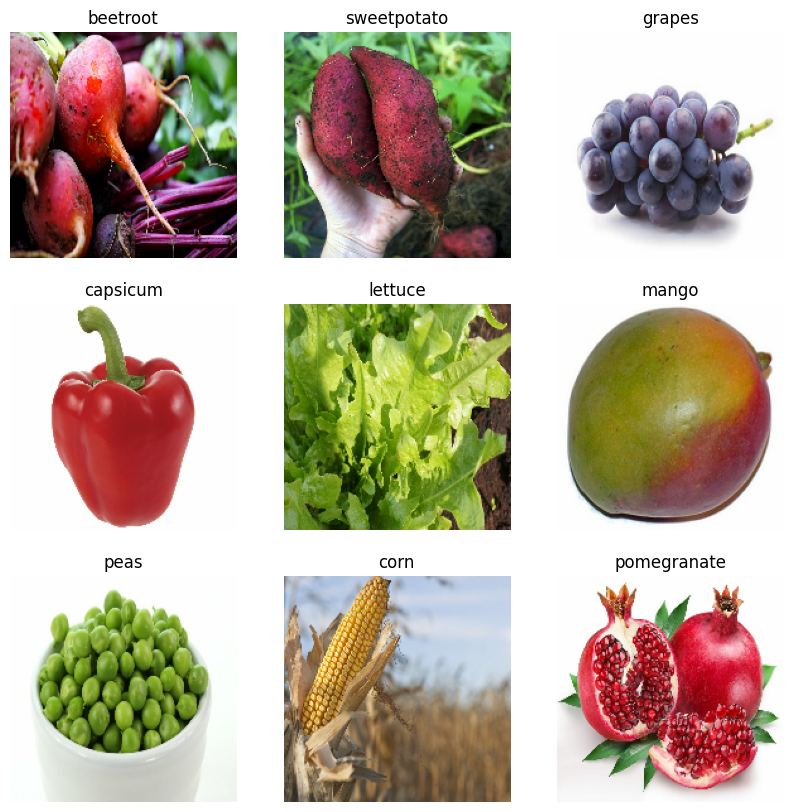

In [11]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [12]:
from tensorflow.keras.models import Sequential

In [13]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))

])

In [15]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [16]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 644s 6s/step - accuracy: 0.0997 - loss: 3.4046 - val_accuracy: 0.3932 - val_loss: 2.0581
Epoch 2/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - accuracy: 0.3452 - loss: 2.2456 - val_accuracy: 0.6154 - val_loss: 1.4601
Epoch 3/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.5028 - loss: 1.7202 - val_accuracy: 0.8632 - val_loss: 0.6577
Epoch 4/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.7135 - loss: 0.9731 - val_accuracy: 0.9088 - val_loss: 0.4164
Epoch 5/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.8630 - loss: 0.4718 - val_accuracy: 0.9231 - val_loss: 0.5114
Epoch 6/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.9346 - loss: 0.2923 - val_accuracy: 0.9573 - val_loss: 0.2831
Epoch 7/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 254s 2s/step - accuracy: 0.9767 - loss: 0.1272 - val_accuracy: 0.9573 - val_loss: 0.2327
Epoch 8/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.9812 - loss: 0.1100 - val_accu

Text(0.5, 1.0, 'Loss')

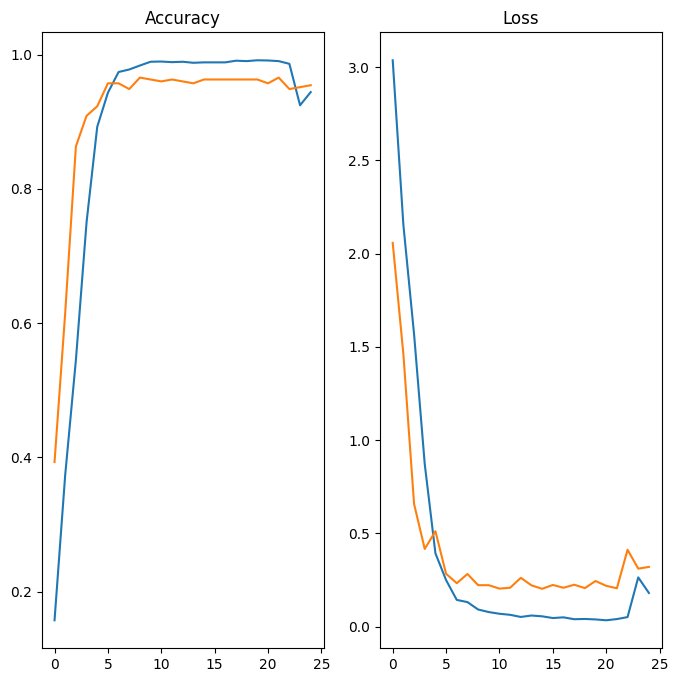

In [17]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [23]:
image = '/content/drive/MyDrive/Project/Image_classification/Apple.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [24]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [25]:
score = tf.nn.softmax(predict)

In [26]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is apple with accuracy of 100.00


In [22]:
model.save('/content/drive/MyDrive/Project/Image_classify_for_app.keras')